# 2023 전세계 유튜브 통계

- 분석목표 : 국가별 어떤 컨텐츠가 가장 많이 보는지
- 데이터셋 : https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

### 컬럼 확인

- 'rank' : 구독자 수에 따른 랭킹
- 'Youtuber' : 채널 이름
- 'subscribers' : 채널 구독자수
- 'video views' : 채널 구독자 수
- 'category' : 카테고리
- 'Title' : 채널 제목
- 'uploads' : 업로드된 동영상 개수(누적)
- 'Country' : 채널이 시작된 국가
- 'Abbreviation' : 국가의 약어
- 'channel_type' : 채널유형
- 'video_views_rank' : 총 동영상 조회수 기준 순위
- 'country_rank' : 해당 국가의 구독자 수를 기준으로 순위
- 'channel_type_rank' : 채널 유형에 따른 순위
- 'video_views_for_the_last_30_days' : 지난 30일동안의 총 동영상 순위
- 'lowest_monthly_earnings' : 최저 예상 월 수입($)
- 'highest_monthly_earnings' : 최대 예상 월 수입($)
- 'lowest_yearly_earnings' : 최저 예상 연간 수입($)
- 'highest_yearly_earnings' : 최대 예상 연간 수입($)
- 'subscribers_for_last_30_days' : 지난 30동안 늘어난 신규 구독자 수
- 'created_year' : 채널 생성 연도
- 'created_month' : 채널 생성 월
- 'created_date' : 채널 생성된 일자
- 'Gross tertiary education enrollment (%)' : 해당 국가의 고등교육에 등록한 인구 비율
- 'Population' : 국가 총 인구
- 'Unemployment rate' : 해당 국가 실업률
- 'Urban_population' : 도시 지역에 거주하는 인구비율
- 'Latitude': 해당 국가 위치의 위도 좌표
- 'Longitude' : 해당 국가 위치의 경도 좌표

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 인코딩 포멧 확인
import chardet

### 파일 불러오기

In [269]:
# 인코딩 포멧 확인
path = './data/youtube/Global_YouTube_Statistics.csv'
with open(path, 'rb') as f:
    re = chardet.detect(f.read(10000))

print(re)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [270]:
path = './data/youtube/Global_YouTube_Statistics.csv'
df = pd.read_csv(path, encoding=re['encoding'])
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [271]:
# 파일 용량때문에 parquet로 변환
df.to_parquet('./data/youtube/Global_YouTube_Statistics.parquet')

In [11]:
df.shape

(995, 28)

In [15]:
df.info()

# 결과를 확인하면 null값이 많다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### 분석에 필요한 컬럼 추출 및 정제

In [76]:
# 분석에 필요한 컬럼
need_col = ['Youtuber', 'subscribers', 'channel_type','uploads', 'Country', 'Abbreviation', 'Unemployment rate']

In [77]:
need_df = df[need_col]
need_df

,Youtuber,subscribers,channel_type,uploads,Country,Abbreviation,Unemployment rate
0,T-Series,245000000,Music,20082,India,IN,5.36
1,YouTube Movies,170000000,Games,1,United States,US,14.70
2,MrBeast,166000000,Entertainment,741,United States,US,14.70
3,Cocomelon - Nursery Rhymes,162000000,Education,966,United States,US,14.70
4,SET India,159000000,Entertainment,116536,India,IN,5.36
...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,Entertainment,1200,Brazil,BR,12.08
991,Free Fire India Official,12300000,Games,1500,India,IN,5.36
992,Panda,12300000,Games,2452,United Kingdom,GB,3.85
993,RobTopGames,12300000,Games,39,Sweden,SE,6.48


In [78]:
need_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Youtuber           995 non-null    object 
 1   subscribers        995 non-null    int64  
 2   channel_type       965 non-null    object 
 3   uploads            995 non-null    int64  
 4   Country            873 non-null    object 
 5   Abbreviation       873 non-null    object 
 6   Unemployment rate  872 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.5+ KB


In [85]:
# 국가, 실업률, channel_type 컬럼 NaN 값 제거
# 이유
# Country == Abbreviation 동일한데 둘다 nan값으로 존재해서 nan 채우지 못함 <- 제거
# Unemployment rate 채울 방법 없음 <- 제거
# channel_type == category 에서 nan값 채울려고했지만 컬럼 의미가 다름 <- 제거

need_df = need_df.dropna(subset=['Country', 'Unemployment rate', 'channel_type'])
need_df

,Youtuber,subscribers,channel_type,uploads,Country,Abbreviation,Unemployment rate
0,T-Series,245000000,Music,20082,India,IN,5.36
1,YouTube Movies,170000000,Games,1,United States,US,14.70
2,MrBeast,166000000,Entertainment,741,United States,US,14.70
3,Cocomelon - Nursery Rhymes,162000000,Education,966,United States,US,14.70
4,SET India,159000000,Entertainment,116536,India,IN,5.36
...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,Entertainment,1200,Brazil,BR,12.08
991,Free Fire India Official,12300000,Games,1500,India,IN,5.36
992,Panda,12300000,Games,2452,United Kingdom,GB,3.85
993,RobTopGames,12300000,Games,39,Sweden,SE,6.48


In [86]:
need_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 0 to 994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Youtuber           865 non-null    object 
 1   subscribers        865 non-null    int64  
 2   channel_type       865 non-null    object 
 3   uploads            865 non-null    int64  
 4   Country            865 non-null    object 
 5   Abbreviation       865 non-null    object 
 6   Unemployment rate  865 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.1+ KB


In [88]:
# 최종 데이터 프레임
need_df

,Youtuber,subscribers,channel_type,uploads,Country,Abbreviation,Unemployment rate
0,T-Series,245000000,Music,20082,India,IN,5.36
1,YouTube Movies,170000000,Games,1,United States,US,14.70
2,MrBeast,166000000,Entertainment,741,United States,US,14.70
3,Cocomelon - Nursery Rhymes,162000000,Education,966,United States,US,14.70
4,SET India,159000000,Entertainment,116536,India,IN,5.36
...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,Entertainment,1200,Brazil,BR,12.08
991,Free Fire India Official,12300000,Games,1500,India,IN,5.36
992,Panda,12300000,Games,2452,United Kingdom,GB,3.85
993,RobTopGames,12300000,Games,39,Sweden,SE,6.48


In [96]:
need_df['Country'].unique().tolist()

['India',
 'United States',
 'Japan',
 'Russia',
 'South Korea',
 'United Kingdom',
 'Canada',
 'Brazil',
 'Argentina',
 'Chile',
 'Cuba',
 'El Salvador',
 'Pakistan',
 'Philippines',
 'Thailand',
 'Colombia',
 'Barbados',
 'Mexico',
 'United Arab Emirates',
 'Spain',
 'Saudi Arabia',
 'Indonesia',
 'Turkey',
 'Venezuela',
 'Kuwait',
 'Jordan',
 'Netherlands',
 'Australia',
 'Italy',
 'Germany',
 'France',
 'Sweden',
 'Afghanistan',
 'Ukraine',
 'Latvia',
 'Switzerland',
 'Vietnam',
 'Malaysia',
 'China',
 'Iraq',
 'Singapore',
 'Egypt',
 'Ecuador',
 'Morocco',
 'Peru',
 'Bangladesh',
 'Finland',
 'Samoa']

### 시각화

In [104]:
# 국가 비율 확인
need_df['Country'].value_counts()

Country
United States           313
India                   166
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    21
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia              9
Ukraine                   8
Australia                 8
United Arab Emirates      7
Japan                     5
France                    5
Pakistan                  5
Germany                   5
Sweden                    4
Turkey                    4
Jordan                    3
Netherlands               3
Chile                     3
Vietnam                   3
Italy                     2
Ecuador                   2
Egypt                     2
Singapore                 2
Iraq                      2
Morocco                   1
China                     1
Peru        

In [115]:
# 한글 폰트
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

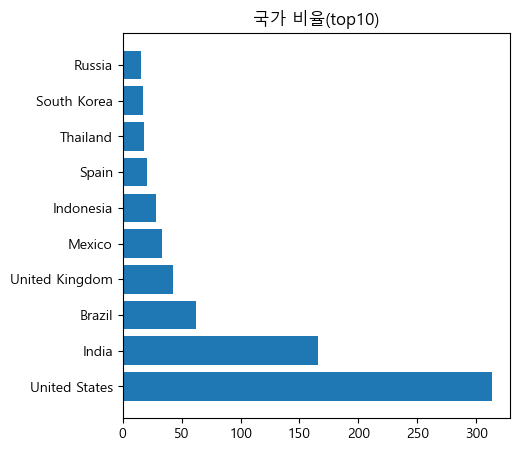

In [138]:
# bar 형태
plt.figure(figsize=(5, 5))
plt.barh(y=need_df['Country'].value_counts().head(10).index, width=need_df['Country'].value_counts().head(10).values)

plt.title('국가 비율(top10)')
plt.show()

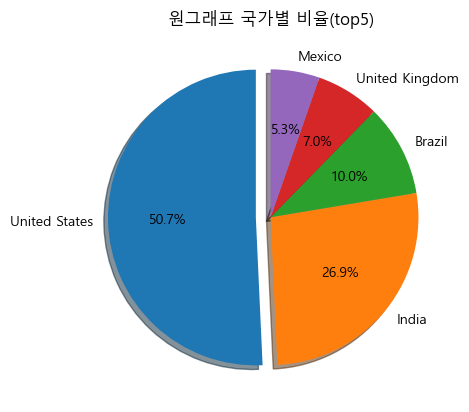

In [134]:
# 원형 형태
explode = (0.1, 0, 0, 0, 0) # 분리
plt.pie(x=need_df['Country'].value_counts().head(5).values, labels=need_df['Country'].value_counts().head(5).index, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)

plt.title('원그래프 국가별 비율(top5)')
plt.show()

In [139]:
need_df

,Youtuber,subscribers,channel_type,uploads,Country,Abbreviation,Unemployment rate
0,T-Series,245000000,Music,20082,India,IN,5.36
1,YouTube Movies,170000000,Games,1,United States,US,14.70
2,MrBeast,166000000,Entertainment,741,United States,US,14.70
3,Cocomelon - Nursery Rhymes,162000000,Education,966,United States,US,14.70
4,SET India,159000000,Entertainment,116536,India,IN,5.36
...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,Entertainment,1200,Brazil,BR,12.08
991,Free Fire India Official,12300000,Games,1500,India,IN,5.36
992,Panda,12300000,Games,2452,United Kingdom,GB,3.85
993,RobTopGames,12300000,Games,39,Sweden,SE,6.48


In [213]:
# 국가, 타입 별로 카운트한 집계함수 사용
group_df = need_df[['Youtuber', 'Country', 'channel_type']].groupby(['Country', 'channel_type'], as_index=False).count()
# 컬럼명 변경
group_df = group_df.rename(columns={'Youtuber' : 'Count'})
group_df

,Country,channel_type,Count
0,Afghanistan,Games,1
1,Argentina,Comedy,1
2,Argentina,Education,1
3,Argentina,Entertainment,3
4,Argentina,Games,3
...,...,...,...
165,United States,Tech,4
166,Venezuela,Comedy,1
167,Vietnam,Comedy,1
168,Vietnam,Entertainment,1


In [235]:
# for문 돌리기전 1단계
country_df = group_df[group_df['Country'] == 'Argentina']
country_df

,Country,channel_type,Count
1,Argentina,Comedy,1
2,Argentina,Education,1
3,Argentina,Entertainment,3
4,Argentina,Games,3
5,Argentina,Music,4
6,Argentina,People,1


In [238]:
raw, col = country_df.shape
raw

6

In [228]:
country_df['Count']

1    1
2    1
3    3
4    3
5    4
6    1
Name: Count, dtype: int64

In [241]:
len(group_df['Country'].unique())

48

In [218]:
# 2단계
channel_type = country_df.max().channel_type
count = country_df.max().Count

In [259]:
channel_type

'People'

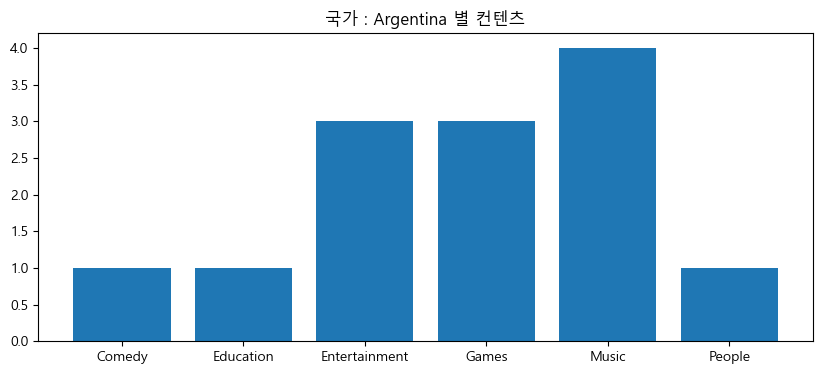

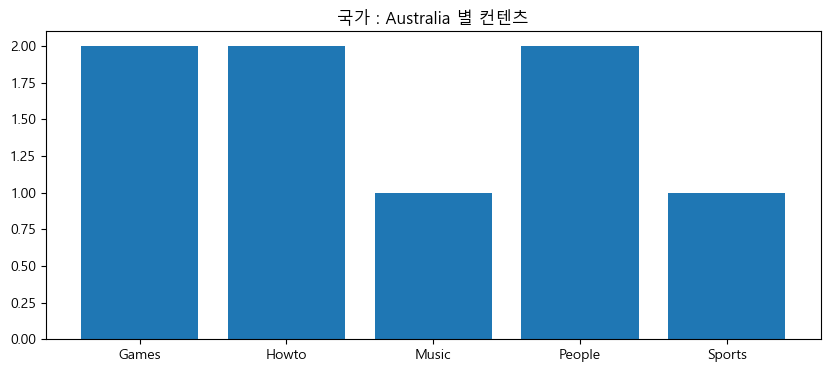

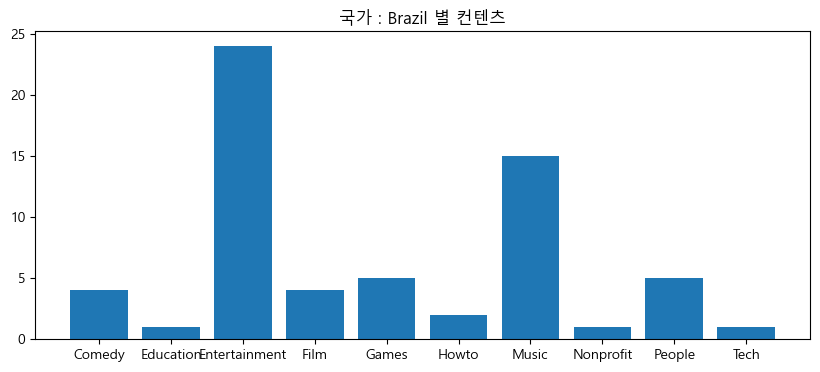

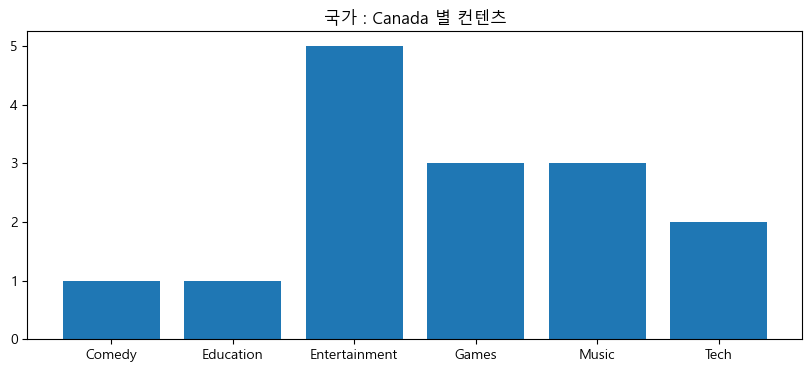

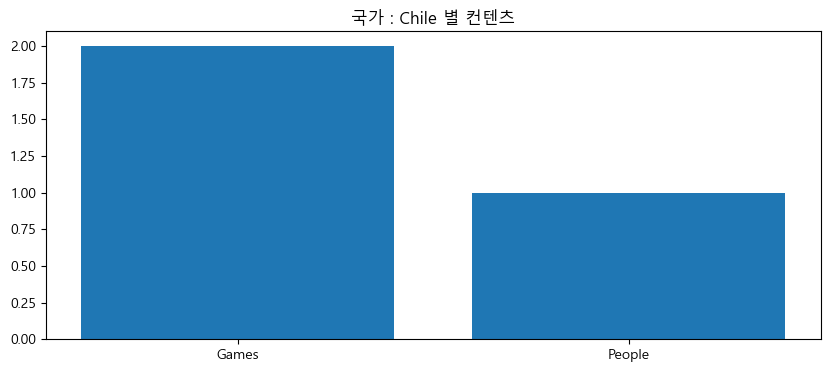

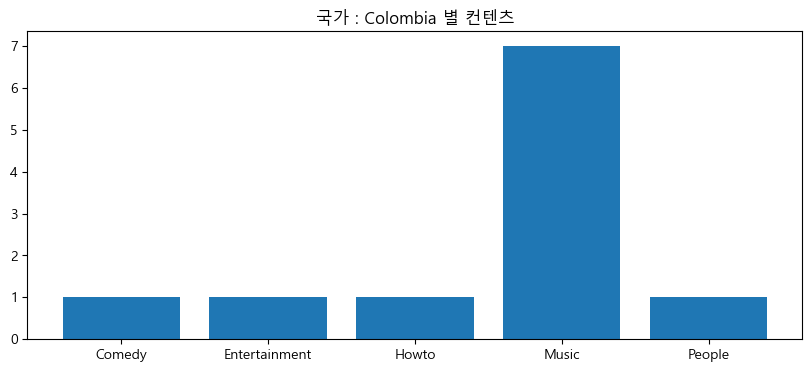

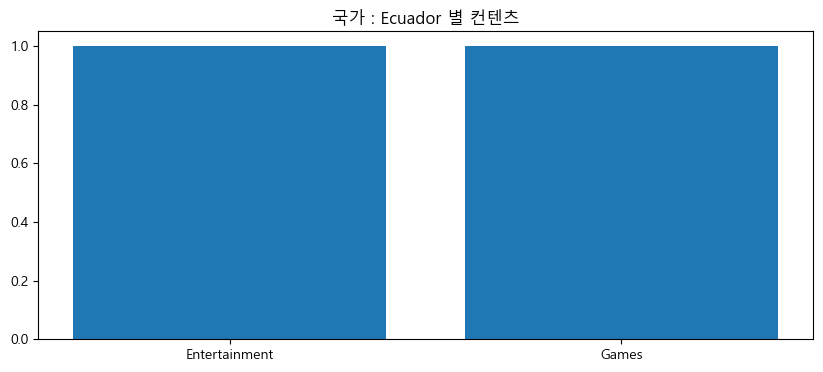

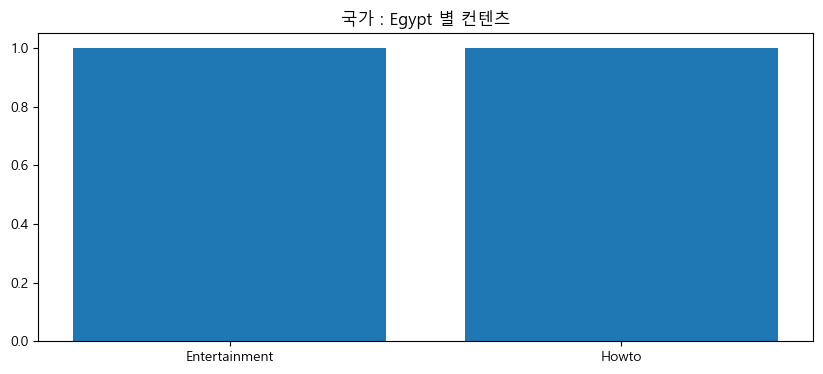

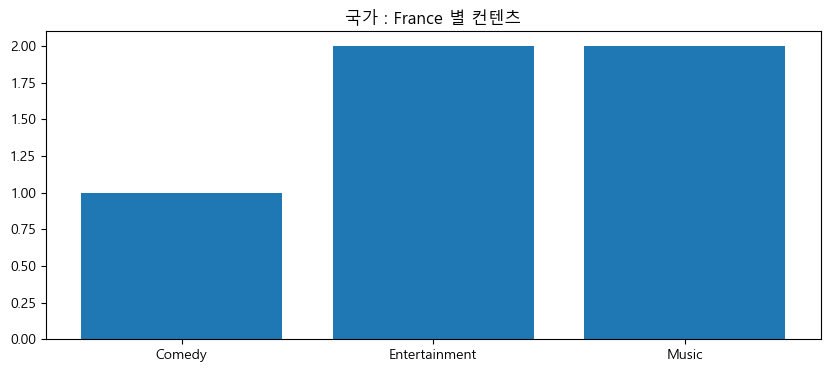

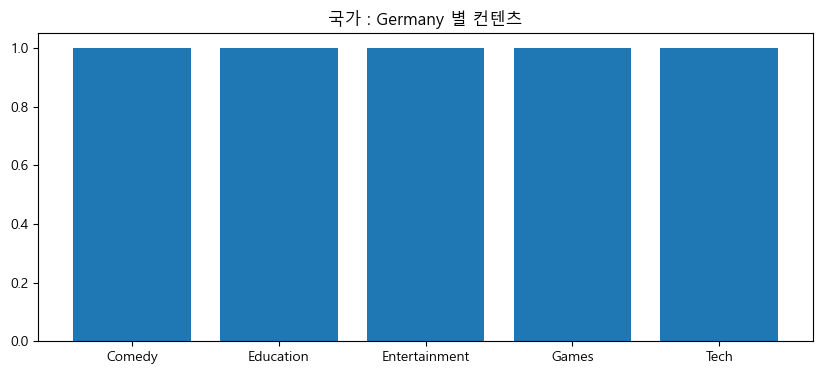

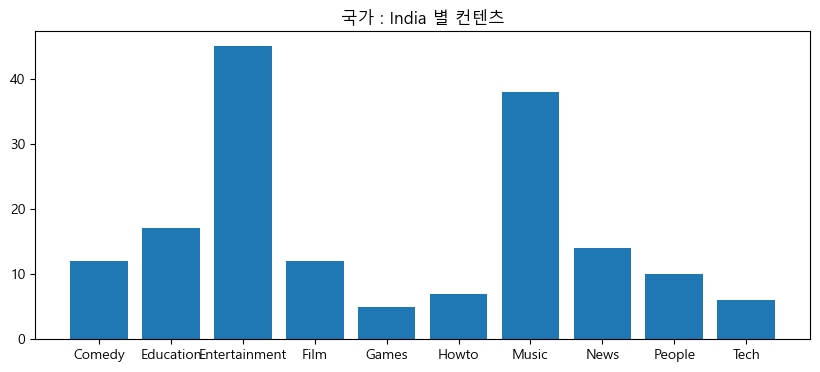

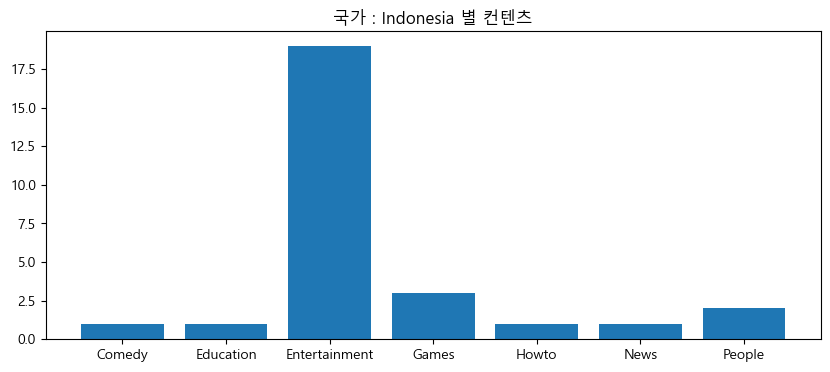

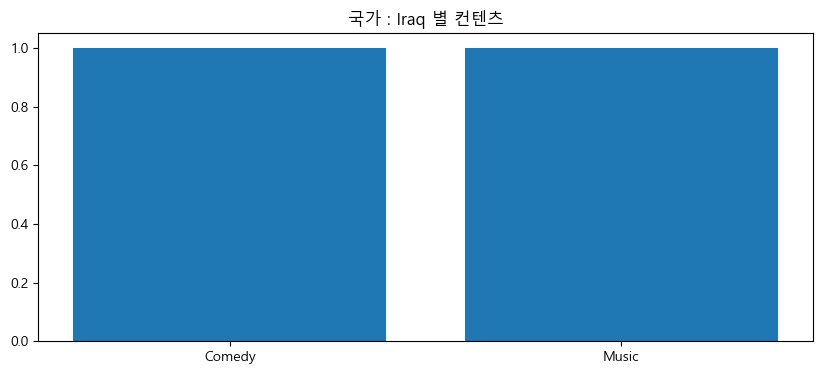

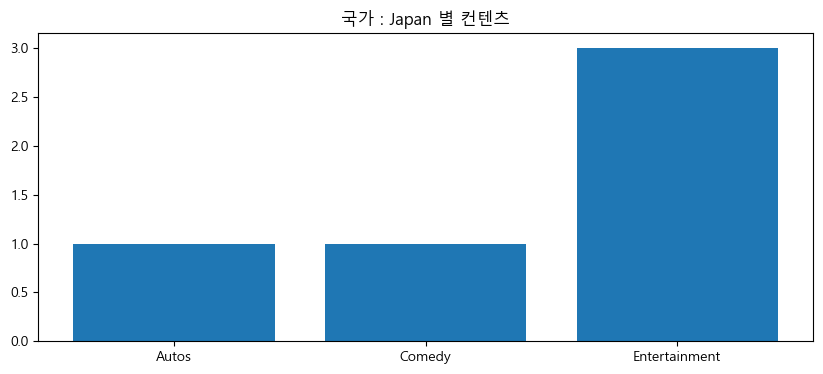

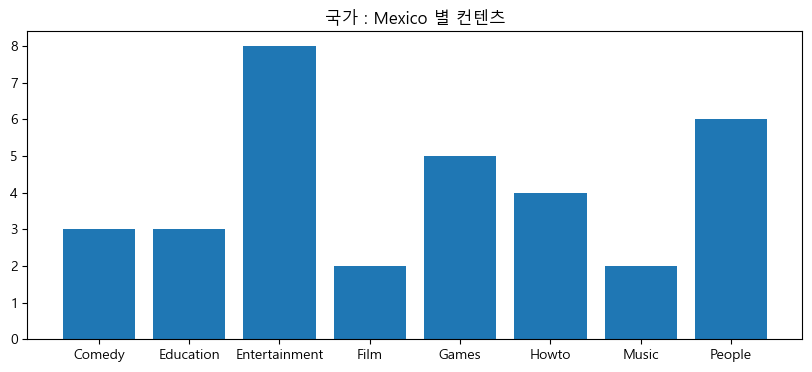

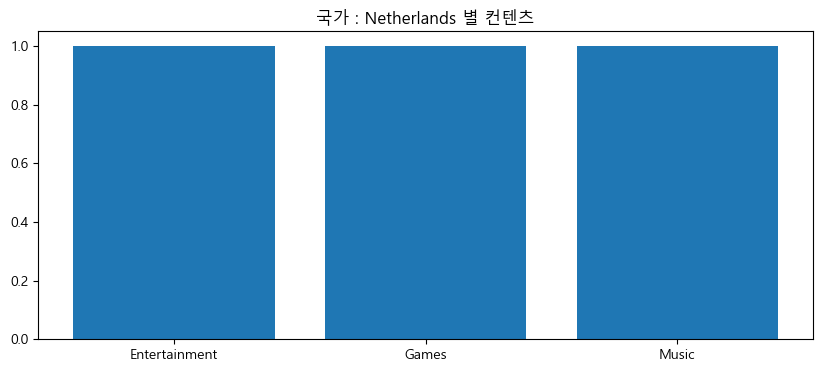

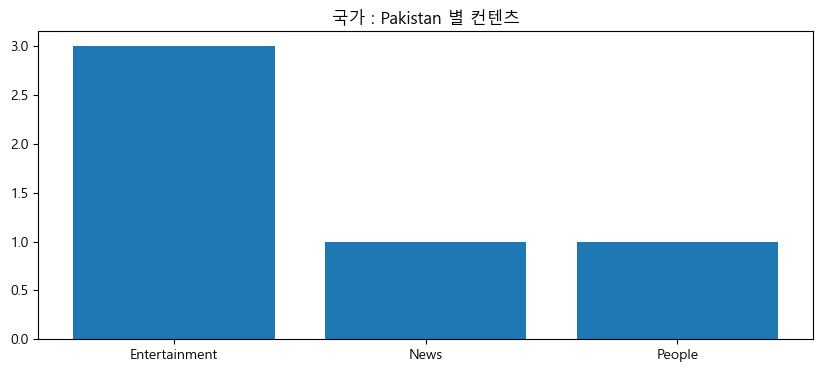

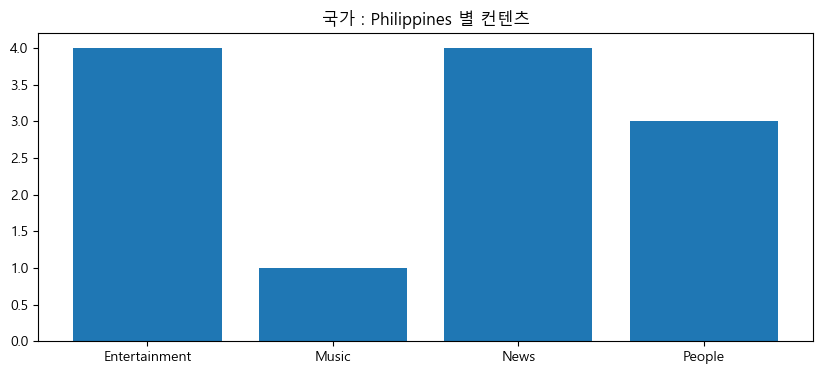

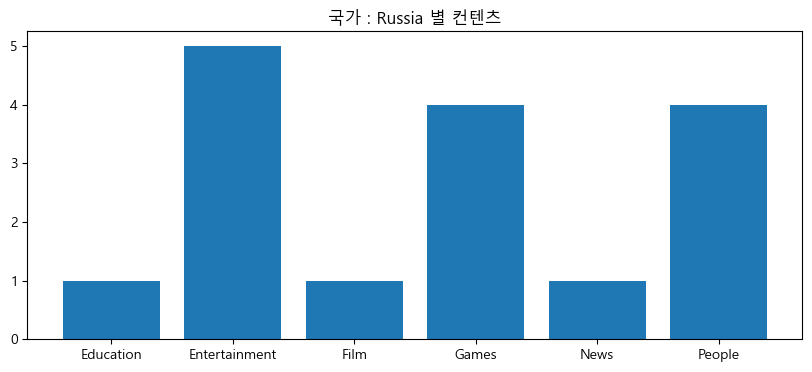

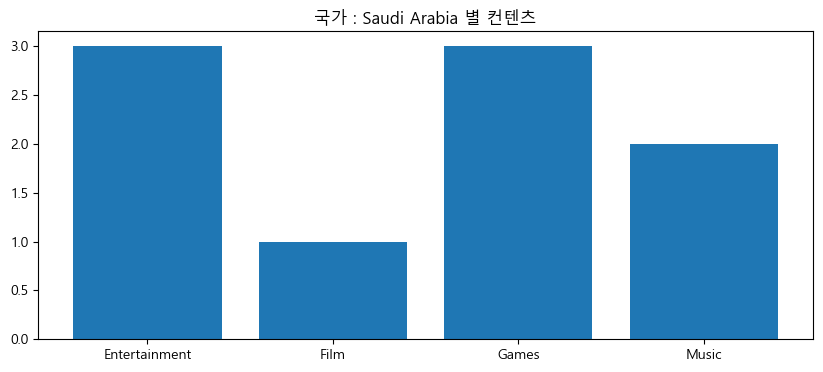

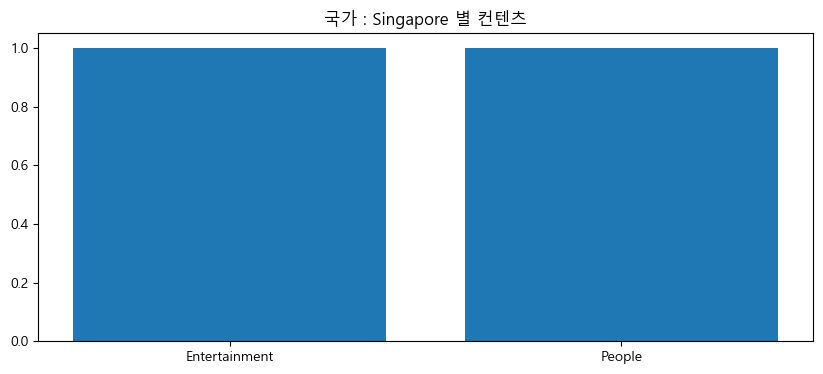

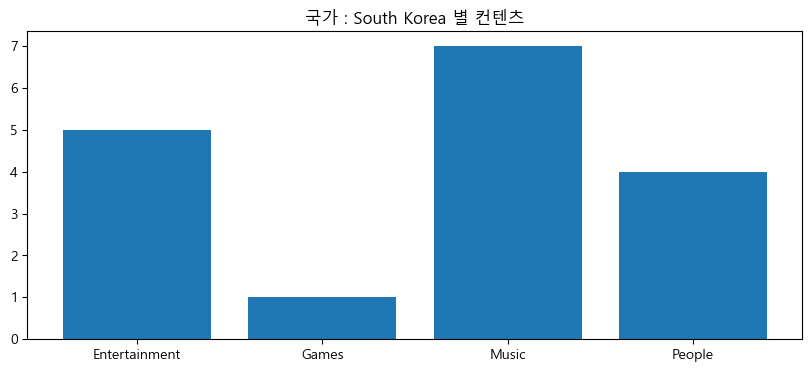

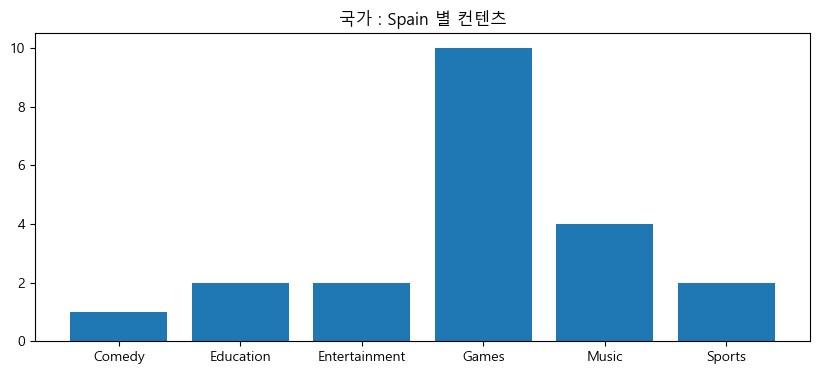

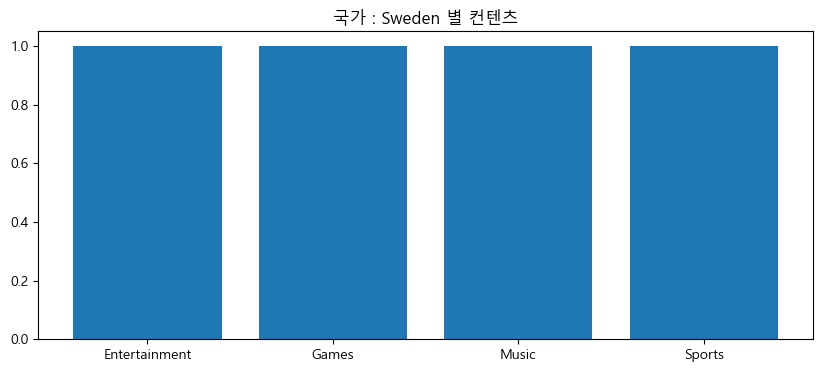

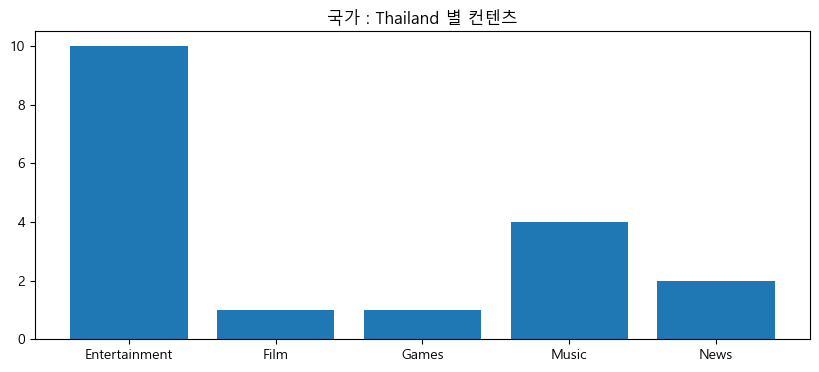

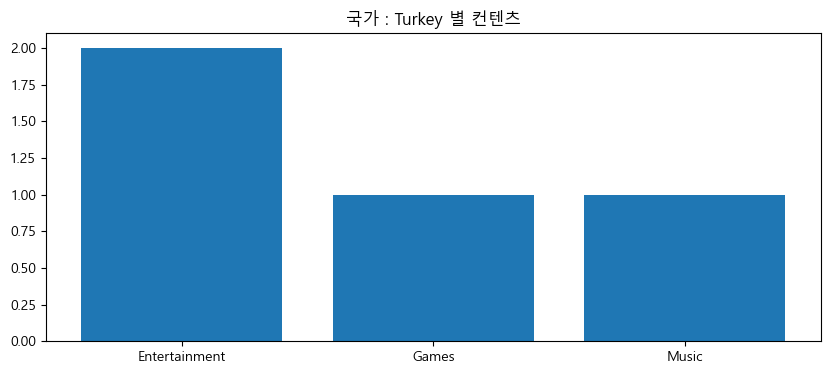

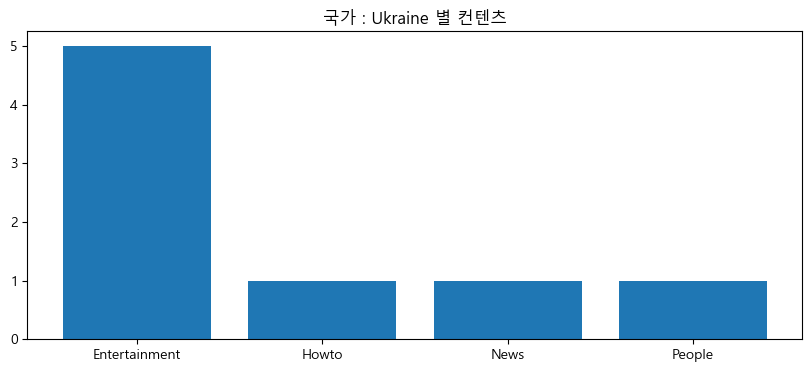

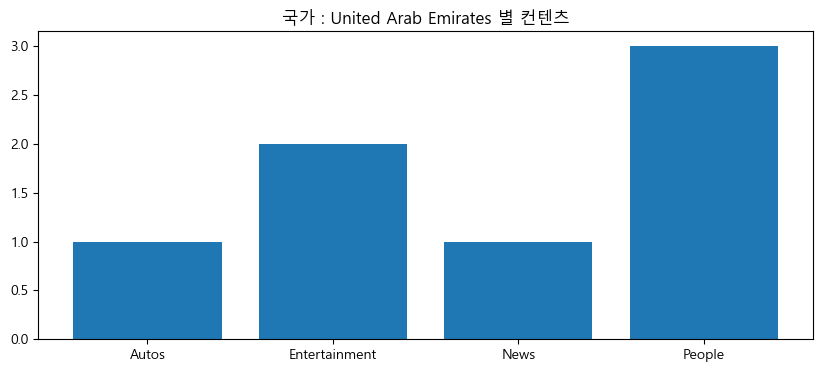

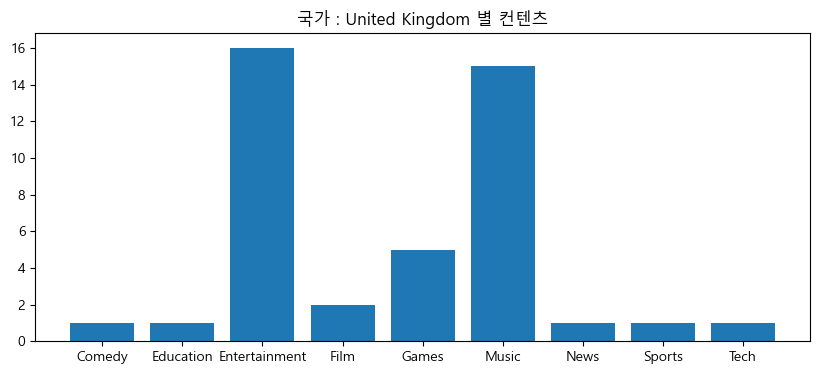

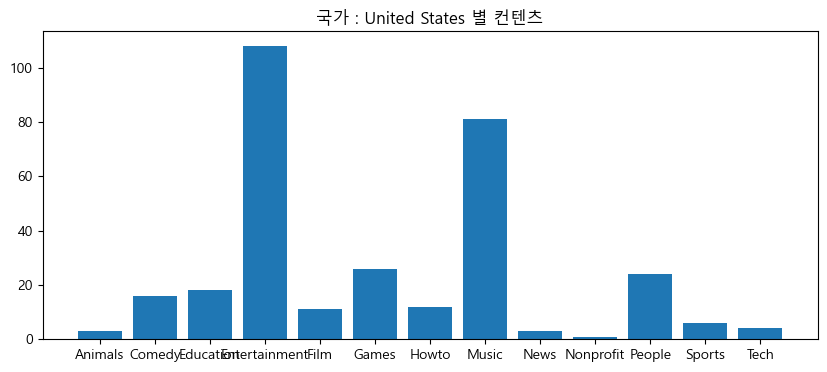

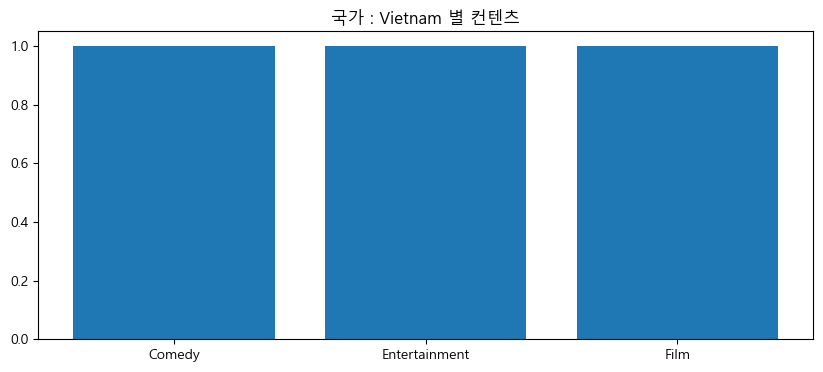

In [265]:
# 최종
data = []
index = []
for _ in group_df['Country'].unique():
    country_df = group_df[group_df['Country'] == _]
    raw, col = country_df.shape
    channel_type = country_df.max().channel_type
    if raw == 1:
        pass
    else:
        plt.figure(figsize=(10, 4))
        plt.bar(x=country_df['channel_type'].values, height=country_df['Count'].values)
        plt.title(f'국가 : {_} 별 컨텐츠')
        plt.show()